In [1]:
import os, sys, json

sys.path.append("../")
sys.path.append("../src/")
sys.path.append("../data/")
sys.path.append("../model_evaluation")
sys.path.append("../model_evaluation/evaluation")

In [2]:
with open("./t2t_eval_gpt.json", "r") as file:
    content = file.read()
    print(content)  # Debugging step
    t2t_gpt = json.loads(content)

with open("./m2m_eval_1_gpt.json", "r") as file:
    content = file.read()
    print(content)  # Debugging step
    m2m_1_gpt = json.loads(content)

with open("./m2m_eval_2_gpt.json", "r") as file:
    content = file.read()
    print(content)  # Debugging step
    m2m_2_gpt = json.loads(content)

{"X_g01.json": 0.7999999999999999, "R_g01.json": 0.73, "E_j01.json": 0.6633333333333334, "M_g01.json": 0.6333333333333333, "R_j04.json": 0.7566666666666667, "G_g01.json": 0.7399999999999999, "R_j03.json": 0.7566666666666667, "M_j02.json": 0.54, "V_k09.json": 0.7566666666666667, "V_k08.json": 0.7799999999999999, "M_j03.json": 0.7866666666666667, "R_j02.json": 0.7200000000000001, "R_j01.json": 0.7366666666666667, "E_j05.json": 0.4833333333333334, "G_j01.json": 0.6033333333333333, "M_k05.json": 0.6733333333333333, "E_j04.json": 0.5433333333333333, "M_j01.json": 0.6533333333333333, "V_g01.json": 0.7966666666666665, "M_g02.json": 0.7733333333333334, "E_j03.json": 0.4533333333333333, "E_j02.json": 0.6133333333333333, "G_g03.json": 0.58}
{"X_g01.json": 0.6652478771161001, "R_g01.json": 0.5150463445743169, "E_j01.json": 0.48849353827138114, "M_g01.json": 0.4884130166582956, "R_j04.json": 0.3725499577384705, "G_g01.json": 0.2959585281530953, "R_j03.json": 0.5212179602119554, "M_j02.json": 0.314

In [53]:
import json
import pandas as pd


gemini_data = pd.read_csv("../output_csv")
t2t, m2m_1, m2m_2 = gemini_data["t2t_eval"], gemini_data["m2m_eval_1"], gemini_data["m2m_eval_2"]

# data = pd.read_csv("../gpt_pett2t.csv")
# t2t_1, t2t_2, m2m_1, m2m_2 = (
#     data["t2t_eval_1"],
#     data["t2t_eval_2"],
#     data["m2m_eval_1"],
#     data["m2m_eval_2"],
# )
data = pd.read_csv("../gpt_real_sett2t.csv")
t2t_1_t2t, t2t_2_t2t, m2m_1_t2t, m2m_2_t2t = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)
data = pd.read_csv("../gpt_real_setm2m.csv")
t2t_1_m2m, t2t_2_m2m, m2m_1_m2m, m2m_2_m2m = (
    data["t2t_eval_1"],
    data["t2t_eval_2"],
    data["m2m_eval_1"],
    data["m2m_eval_2"],
)

/var/folders/nn/rsh9pz9s4mj886ccd7vnn0yc0000gn/T/ipykernel_6841/1829733498.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


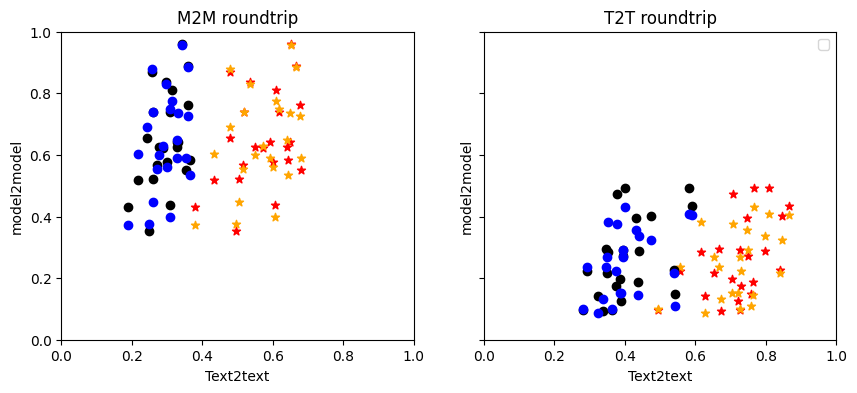

In [54]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axs[0].scatter(t2t_1_m2m.values, m2m_1_m2m.values, marker="*", color="red")
axs[0].scatter(t2t_1_m2m.values, m2m_2_m2m.values, marker="*", color="orange")
axs[0].scatter(t2t_2_m2m.values, m2m_1_m2m.values, marker="o", color="black")
axs[0].scatter(t2t_2_m2m.values, m2m_2_m2m.values, marker="o", color="blue")
axs[0].set_title("M2M roundtrip")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_xlabel("Text2text")
axs[0].set_ylabel("model2model")

axs[1].scatter(t2t_1_t2t.values, m2m_1_t2t.values, marker="*", color="red")
axs[1].scatter(t2t_1_t2t.values, m2m_2_t2t.values, marker="*", color="orange")
axs[1].scatter(t2t_2_t2t.values, m2m_1_t2t.values, marker="o", color="black")
axs[1].scatter(t2t_2_t2t.values, m2m_2_t2t.values, marker="o", color="blue")
axs[1].set_title("T2T roundtrip")
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_xlabel("Text2text")
axs[1].set_ylabel("model2model")

plt.legend()

In [55]:
from scipy.stats import pearsonr, spearmanr

print(pearsonr(list(t2t_1_t2t.values), list(m2m_1_t2t.values)))
print(pearsonr(list(t2t_1_t2t.values), list(m2m_2_t2t.values)))
print(pearsonr(list(t2t_2_t2t.values), list(m2m_1_t2t.values)))
print(pearsonr(list(t2t_2_t2t.values), list(m2m_2_t2t.values)))

PearsonRResult(statistic=0.48948202047336953, pvalue=0.01775911380478082)
PearsonRResult(statistic=0.4170293812538761, pvalue=0.04773403391949491)
PearsonRResult(statistic=0.46580505343093354, pvalue=0.025084143299269657)
PearsonRResult(statistic=0.3755790692994037, pvalue=0.07738277236673297)


In [56]:
print(pearsonr(list(t2t_1_m2m.values), list(m2m_1_m2m.values)))
print(pearsonr(list(t2t_1_m2m.values), list(m2m_2_m2m.values)))
print(pearsonr(list(t2t_2_m2m.values), list(m2m_1_m2m.values)))
print(pearsonr(list(t2t_2_m2m.values), list(m2m_2_m2m.values)))

PearsonRResult(statistic=0.3777153968190724, pvalue=0.07557834282236447)
PearsonRResult(statistic=0.36683429098222753, pvalue=0.08510932225230135)
PearsonRResult(statistic=0.4307342641245987, pvalue=0.04018600409887998)
PearsonRResult(statistic=0.39487428878784575, pvalue=0.062216925972826145)
